<h1>Data Visualisation</h1>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

reviews = pd.read_csv("data/fandango_score_comparison.csv")
cols = ["FILM","RT_user_norm","Metacritic_user_nom","IMDB_norm","Fandango_Ratingvalue","Fandango_Stars"]
norm_reviews = reviews[["FILM","RT_user_norm","Metacritic_user_nom","IMDB_norm","Fandango_Ratingvalue","Fandango_Stars"]]

recent_grads = pd.read_csv("data/recent-grads.csv")
recent_grads = recent_grads.dropna()

## Quick Charts

/Users/Jemima/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


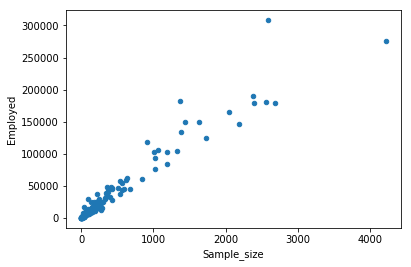

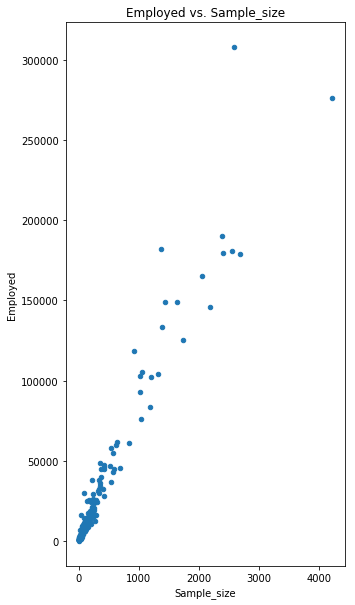

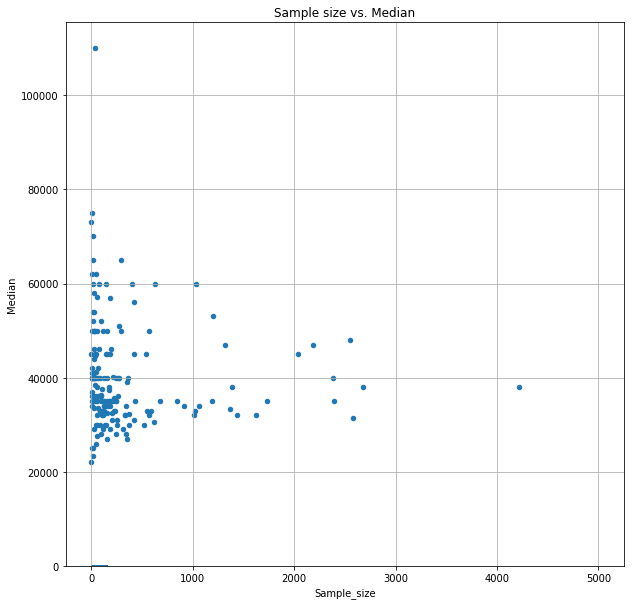

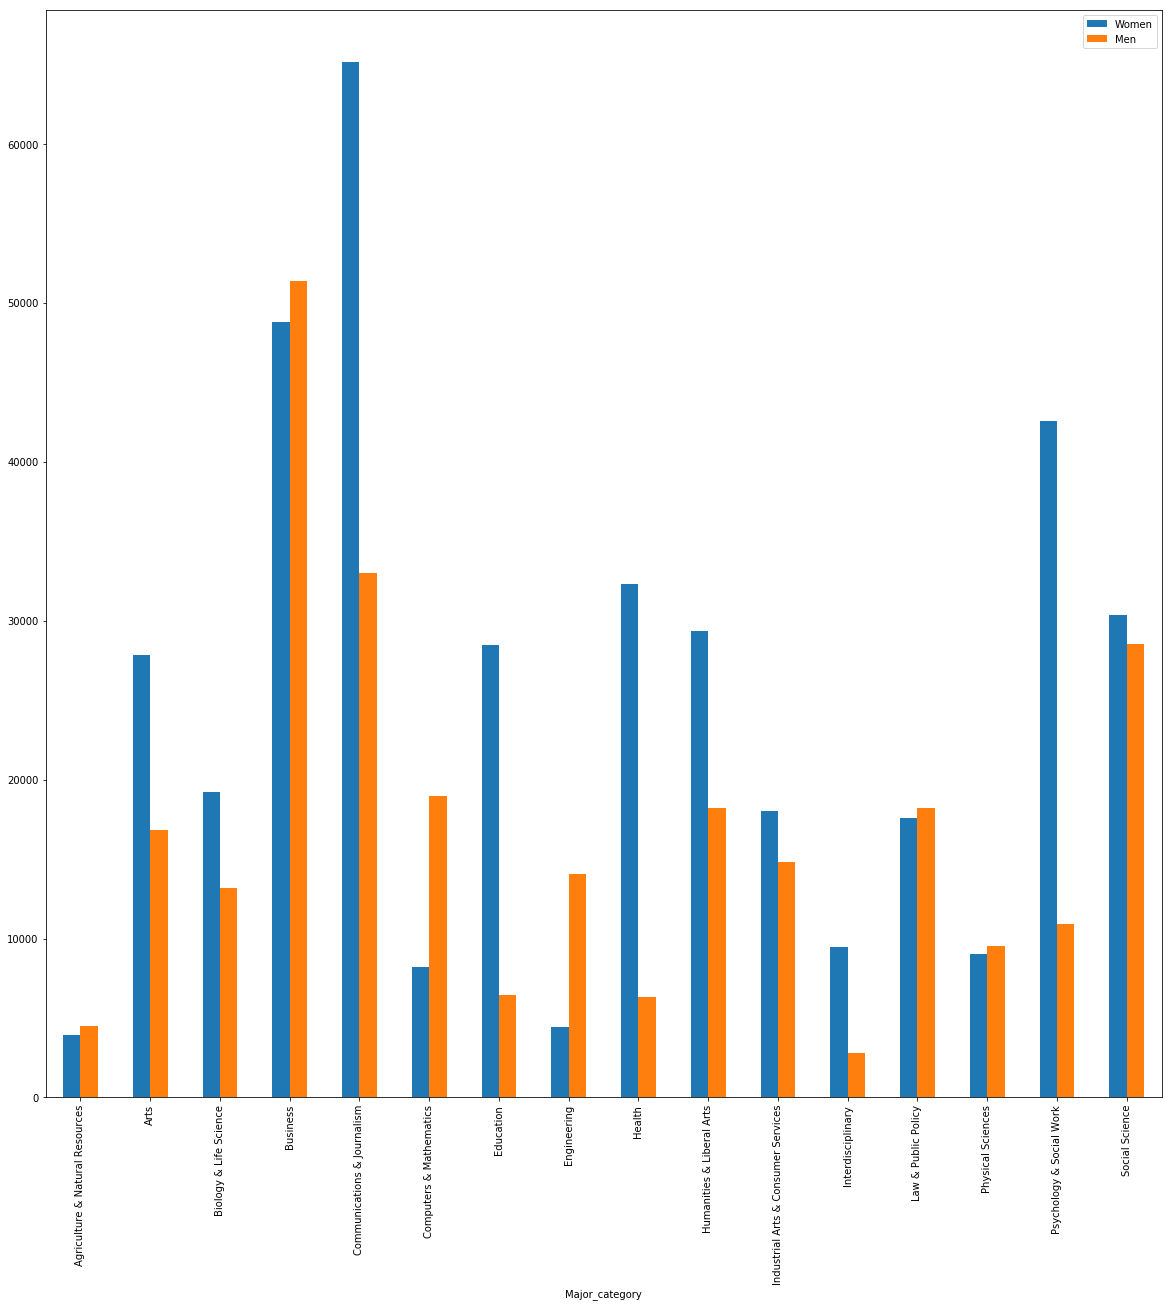

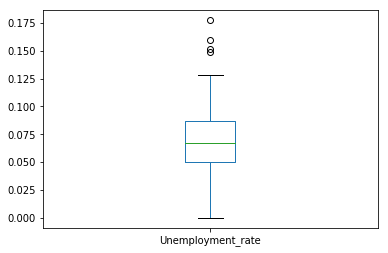

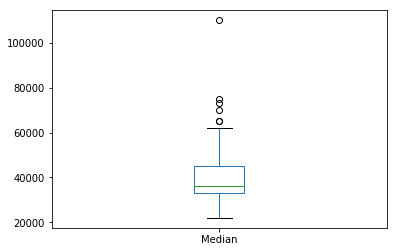

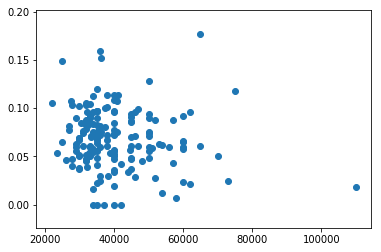

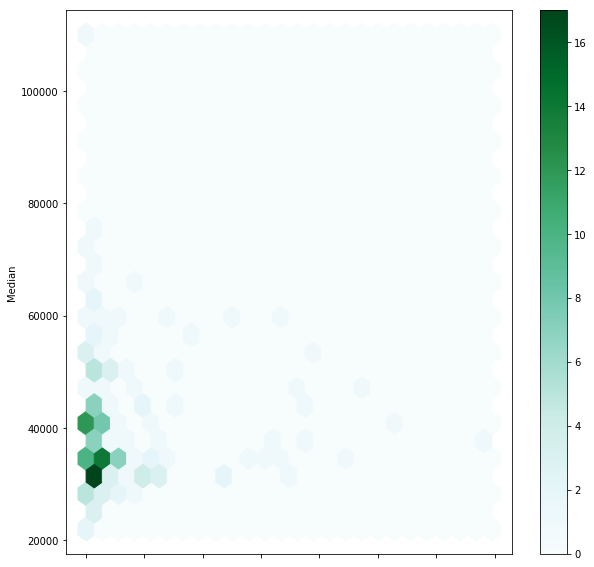

In [3]:
recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')
recent_grads.plot(x='Sample_size', y='Employed', kind='scatter', title='Employed vs. Sample_size', figsize=(5,10))
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Sample size vs. Median', figsize=(10,10))

recent_grads['Sample_size'].hist(bins=30, range=(0,5000))

grouped_grads = recent_grads.pivot_table(index="Major_category", values=["Women","Men"])
grouped_grads.plot.bar(x=grouped_grads.index, y=['Women','Men'],figsize=(20,20))
plt.show()

recent_grads["Unemployment_rate"].plot.box()
plt.show()

recent_grads["Median"].plot.box()
plt.show()

plt.scatter(recent_grads["Median"], recent_grads["Unemployment_rate"])
plt.show()

recent_grads.plot.hexbin(x='Men', y='Median', gridsize=25, figsize=(10,10))

## Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119a192b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1ca6fb00>]], dtype=object)

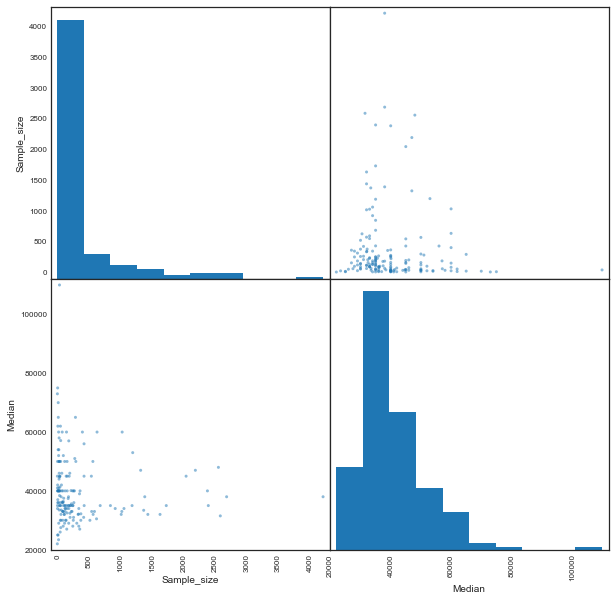

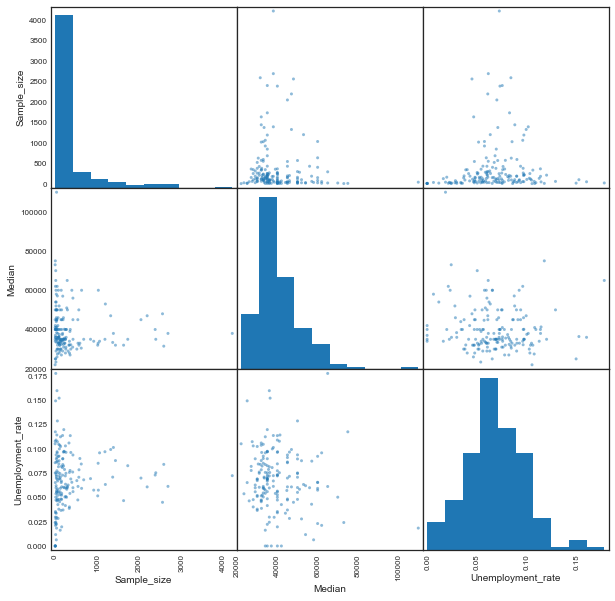

In [40]:
from pandas.plotting import scatter_matrix

# Create a 2 by 2 scatter matrix plot using the Sample_size and Median columns.
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

# Create a 3 by 3 scatter matrix plot using the Sample_size, Median, and Unemployment_rate columns.
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

## Setting a style

In [41]:
plt.style.use('fivethirtyeight')

## Figures
A figure acts as a container for all of our plots and has methods for customizing the appearance and behavior for the plots within that container.

In [ ]:
fig = plt.figure()

## Axes/Subplots

The Axes object acts as its own container for the various components of the plot, such as:
-  values on the x-axis and y-axis
-  ticks on the x-axis and y-axis
- all visual symbols, such as:
    --  markers
    --  lines
    -- gridlines

While plots are represented using instances of the Axes class, they're also often referred to as subplots in matplotlib

In [49]:
#Add new subplot to figure:
axes_obj = fig.add_subplot(nrows, ncols, plot_number)

NameError: name 'nrows' is not defined

In [ ]:
## Creating Bars ##

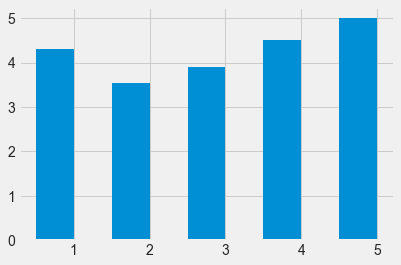

In [42]:
from numpy import arange

num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_heights = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75

fig, ax = plt.subplots()
ax.bar(bar_positions,bar_heights,0.5)
plt.show()

## Aligning Axis Ticks And Labels ##

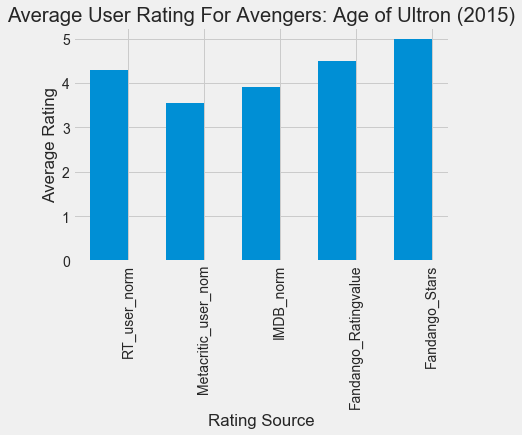

In [43]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_heights = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)

fig, ax = plt.subplots()

ax.bar(bar_positions,bar_heights,0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols,rotation=90)
ax.set_xlabel("Rating Source")
ax.set_ylabel("Average Rating")
ax.set_title("Average User Rating For Avengers: Age of Ultron (2015)")
plt.show()

## Horizontal Bar Plot ##

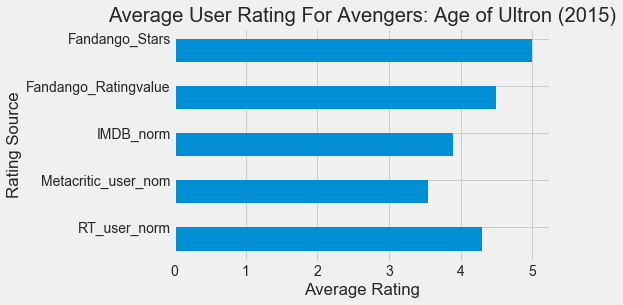

In [44]:
import matplotlib.pyplot as plt
from numpy import arange
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_widths = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)

fig, ax = plt.subplots()
ax.barh(bar_positions, bar_widths, 0.5)
ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
ax.set_ylabel("Rating Source")
ax.set_xlabel("Average Rating")
ax.set_title("Average User Rating For Avengers: Age of Ultron (2015)")
plt.show()

## Scatter plot ##

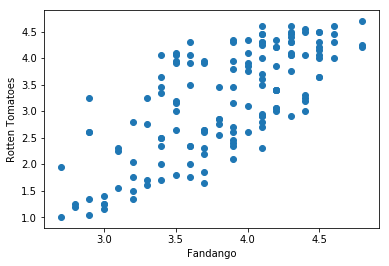

In [10]:
fig, ax = plt.subplots()

ax.scatter(norm_reviews["Fandango_Ratingvalue"],norm_reviews["RT_user_norm"])
ax.set_xlabel("Fandango")
ax.set_ylabel("Rotten Tomatoes")
plt.show()

## Switching axes ##

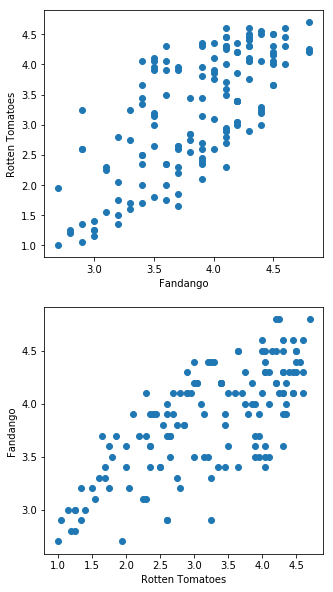

In [11]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.scatter(norm_reviews["Fandango_Ratingvalue"],norm_reviews["RT_user_norm"])
ax1.set_xlabel("Fandango")
ax1.set_ylabel("Rotten Tomatoes")

ax2.scatter(norm_reviews["RT_user_norm"],norm_reviews["Fandango_Ratingvalue"])
ax2.set_ylabel("Fandango")
ax2.set_xlabel("Rotten Tomatoes")

plt.show()

## Benchmarking correlation ##

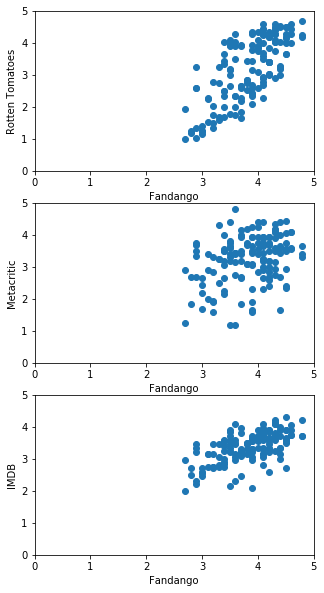

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.scatter(norm_reviews["Fandango_Ratingvalue"],norm_reviews["RT_user_norm"])
ax1.set_xlabel("Fandango")
ax1.set_ylabel("Rotten Tomatoes")
ax1.set_xlim(0,5)
ax1.set_ylim(0,5)

ax2.scatter(norm_reviews["Fandango_Ratingvalue"],norm_reviews["Metacritic_user_nom"])
ax2.set_xlabel("Fandango")
ax2.set_ylabel("Metacritic")
ax2.set_xlim(0,5)
ax2.set_ylim(0,5)

ax3.scatter(norm_reviews["Fandango_Ratingvalue"],norm_reviews["IMDB_norm"])
ax3.set_xlabel("Fandango")
ax3.set_ylabel("IMDB")
ax3.set_xlim(0,5)
ax3.set_ylim(0,5)

plt.show()

## Frequency Distribution ##
A column's frequency distribution consists of the unique values in that column along with the count for each of those values (or their frequency).
We need a way to compare frequencies across a shared set of values. Because all ratings have been normalized to a range of 0 to 5, we can start by dividing the range of possible values into a series of fixed length intervals, called bins. We can then sum the frequencies for the values that fall into each bin. Here's a diagram that makes binning easier to understand:


In [25]:
freq_counts = norm_reviews["Fandango_Ratingvalue"].value_counts()
fandango_distribution = freq_counts.sort_index()

freq_counts = norm_reviews["IMDB_norm"].value_counts()
imdb_distribution = freq_counts.sort_index()


## Histogram In Matplotlib ##
Histograms help us visualize continuous values using bins while bar plots help us visualize discrete values. The locations of the bars on the x-axis matter in a histogram but they don't in a simple bar plot. Lastly, bar plots also have gaps between the bars, to emphasize that the values are discrete.

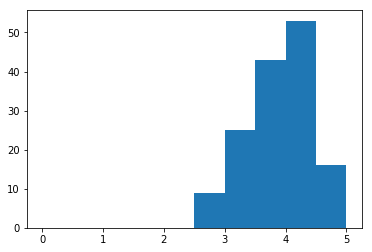

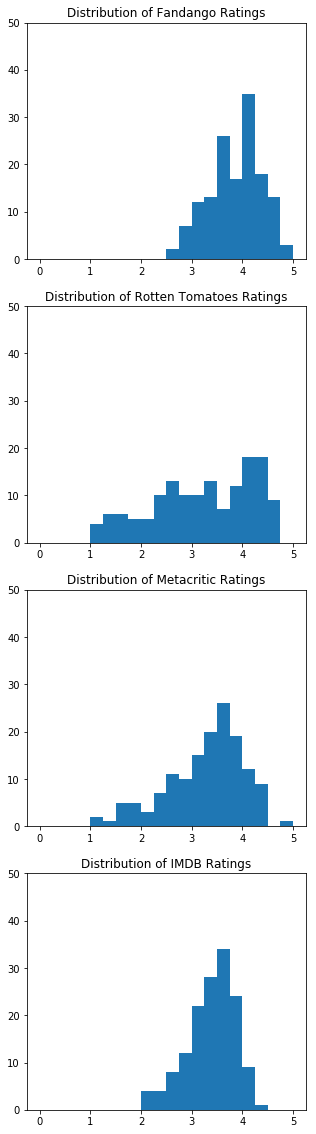

In [14]:
fig, ax = plt.subplots()
ax.hist(norm_reviews["Fandango_Ratingvalue"],range=(0,5))
plt.show()

## 5. Comparing histograms ##

fig = plt.figure(figsize=(5,20))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.hist(norm_reviews["Fandango_Ratingvalue"],bins=20,range=(0,5))
ax1.set_title("Distribution of Fandango Ratings")
ax2.hist(norm_reviews["RT_user_norm"],bins=20,range=(0,5))
ax2.set_title("Distribution of Rotten Tomatoes Ratings")
ax3.hist(norm_reviews["Metacritic_user_nom"],bins=20,range=(0,5))
ax3.set_title("Distribution of Metacritic Ratings")
ax4.hist(norm_reviews["IMDB_norm"],bins=20,range=(0,5))
ax4.set_title("Distribution of IMDB Ratings")
ax1.set_ylim(0,50)
ax2.set_ylim(0,50)
ax3.set_ylim(0,50)
ax4.set_ylim(0,50)

plt.show()

## Box Plots ##
While histograms allow us to visually estimate the percentage of ratings that fall into a range of bins, they don't allow us to easily understand how the top 25% or the bottom 25% of the ratings differ across the sites. The bottom 25% of values and top 25% of values both represent quartiles. The four quartiles divide the range of values into four regions where each region contains 1/4th of the total values.

A box plot consists of box-and-whisker diagrams, which represents the different quartiles in a visual way. 

The two regions contained within the box in the middle make up the interquartile range, or IQR. The IQR is used to measure dispersion of the values. The ratio of the length of the box to the whiskers around the box helps us understand how values in the distribution are spread out.

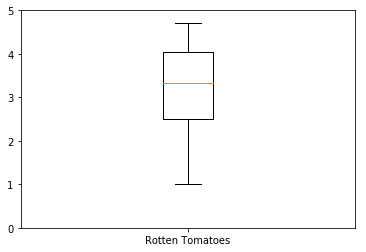

In [15]:
fig, ax = plt.subplots()

ax.boxplot(norm_reviews["RT_user_norm"])
ax.set_ylim(0,5)

ax.set_xticklabels(["Rotten Tomatoes"])
plt.show()

## Multiple Box Plots ##

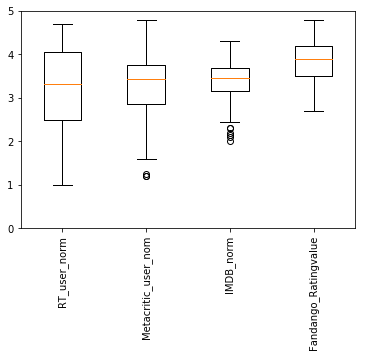

In [16]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']

fig, ax = plt.subplots()
ax.boxplot(norm_reviews[num_cols].values)
ax.set_xticklabels(num_cols,rotation=90)
ax.set_ylim(0,5)
plt.show()

## Line Charts

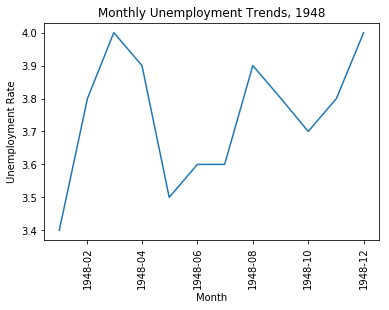

In [17]:
unrate = pd.read_csv("data/unrate.csv")
unrate["DATE"] = pd.to_datetime(unrate["DATE"])

plt.plot(unrate["DATE"].head(12),unrate["VALUE"].head(12))

# fix axis ticks
plt.xticks(rotation=90)

# add labels and a title
plt.xlabel("Month")
plt.ylabel("Unemployment Rate")
plt.title("Monthly Unemployment Trends, 1948")

plt.show()

<h3>Multiple Plots</h3>

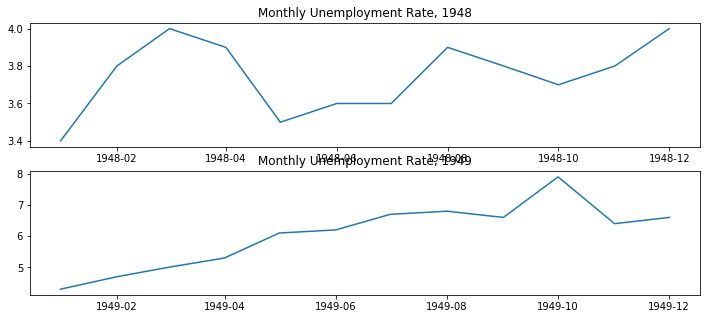

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])
ax1.set_title('Monthly Unemployment Rate, 1948')
ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])
ax2.set_title('Monthly Unemployment Rate, 1949')
plt.show()


## Dynamically add plots ##

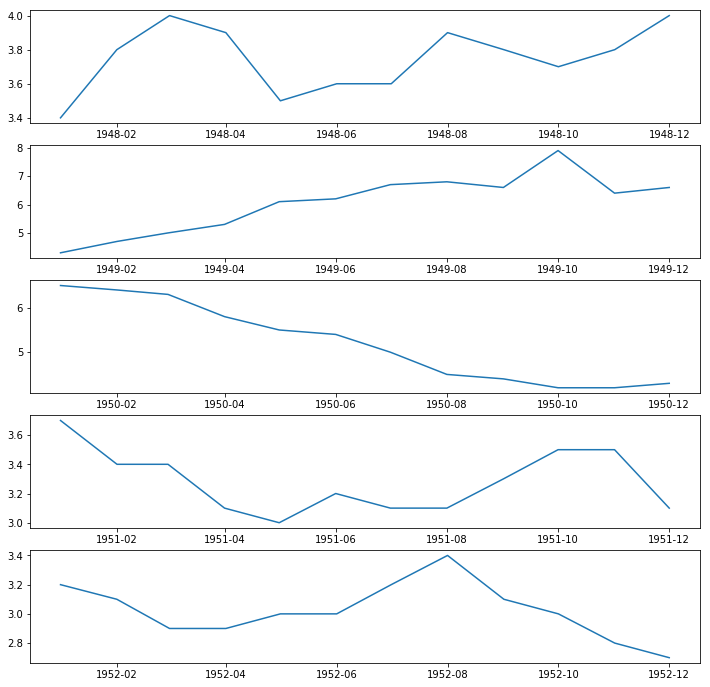

In [19]:
fig = plt.figure(figsize=(12,12))

for i in range(5):
    
    ax = fig.add_subplot(5,1,i+1)
    start_at = i * 12
    end_at = i * 12 +12
    data = unrate[start_at:end_at]
    ax.plot(data["DATE"],data["VALUE"])

plt.show()

## Overlaying Line Charts ##

Don’t use subplots, plot in order

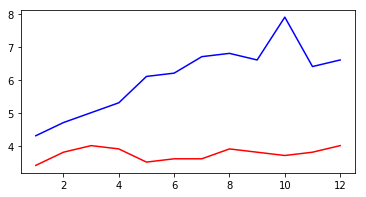

In [20]:
unrate['MONTH'] = unrate['DATE'].dt.month

fig = plt.figure(figsize=(6,3))
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'],c="red")
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'],c="blue")

plt.show()

## Dynamically adding More Lines ##

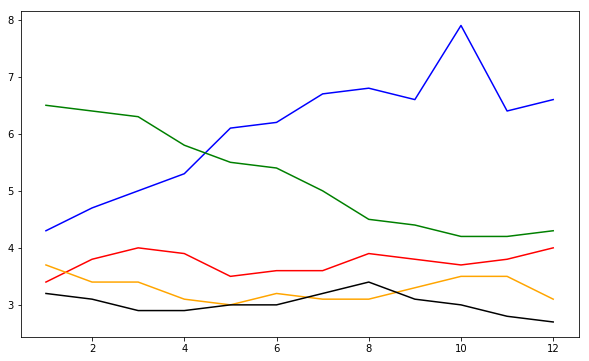

In [21]:
fig = plt.figure(figsize=(10,6))

colours = ["red","blue","green","orange","black"]

for i in range(5):
    start_at = i * 12
    end_at = start_at + 12
    data = unrate[start_at:end_at]
    plt.plot(data["MONTH"],data["VALUE"],c=colours[i])

plt.show()

## Adding a Legend ##

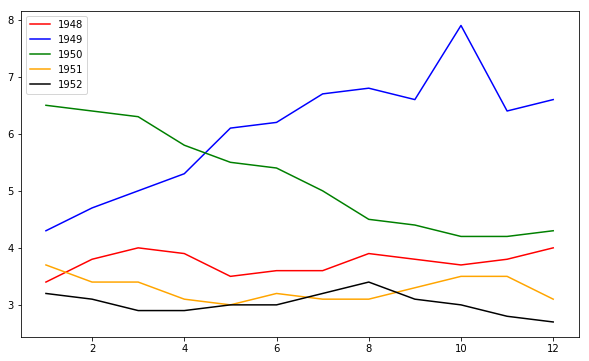

In [22]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=str(1948 +i))
plt.legend(loc='upper left')
plt.show()

## Add labels and title

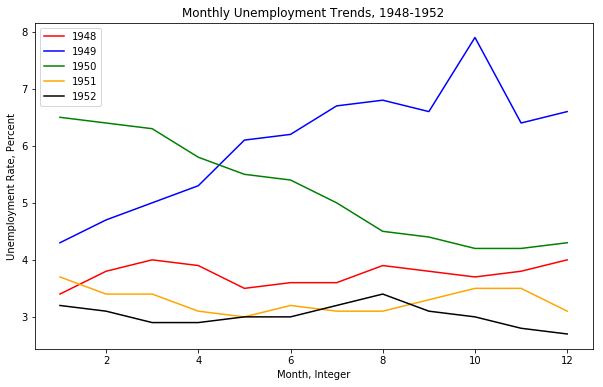

In [23]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)
plt.legend(loc='upper left')
plt.title("Monthly Unemployment Trends, 1948-1952")
plt.xlabel("Month, Integer")
plt.ylabel("Unemployment Rate, Percent")
plt.show()

## Setting Line Color Using RGB ##

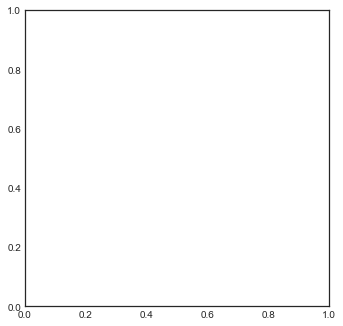

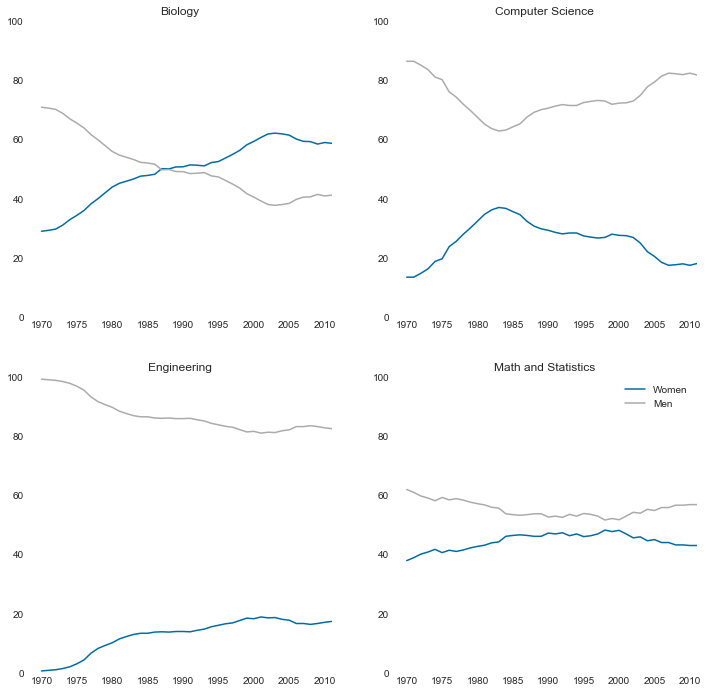

In [32]:
women_degrees = pd.read_csv('data/percent-bachelors-degrees-women-usa.csv')

fig = plt.figure(figsize=(12, 12))
cb_dark_blue = (0/255,107/255,164/255)
cb_dark_orange = (171/255,171/255,171/255)
for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    # The color for each line is assigned here.
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c=cb_dark_blue, label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c=cb_dark_orange, label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.legend(loc='upper right')
plt.show()

## Setting Line Width ##

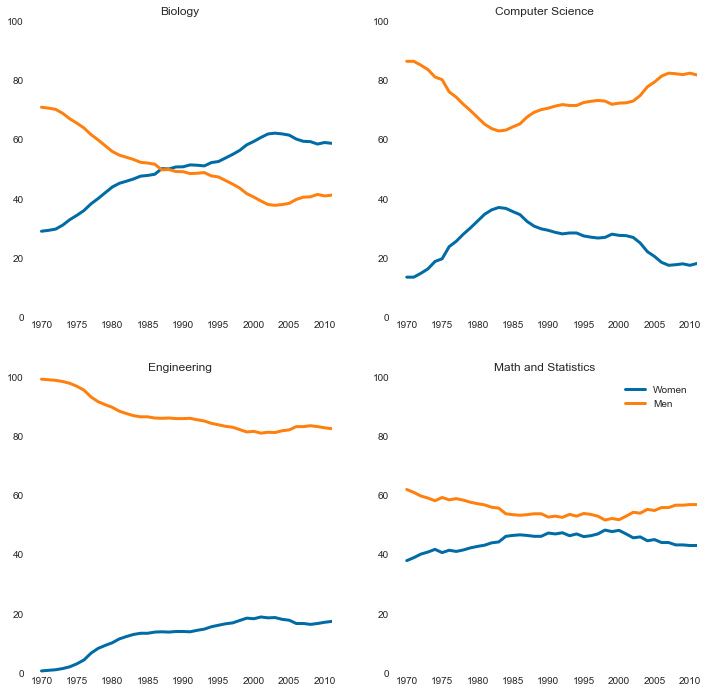

In [33]:
cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    # Set the line width when specifying how each line should look.
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c=cb_orange, label='Men',linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.legend(loc='upper right')
plt.show()

## Layout and Ordering ##

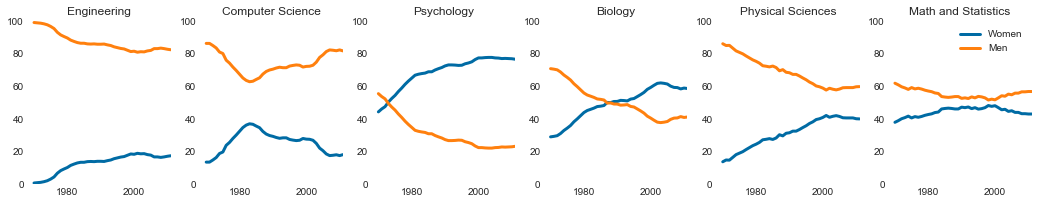

In [34]:
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.legend(loc='upper right')
plt.show()

## Annotating charts ##

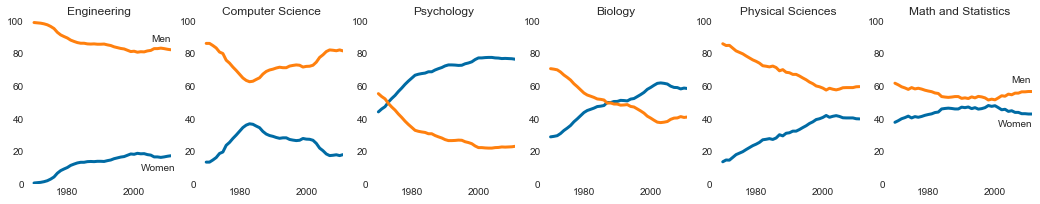

In [35]:
fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

    if sp == 0:
        # left most chart
        ax.text(2005, 87, "Men")
        ax.text(2002, 8, "Women")
        
    if sp == 5:
        # right most chart
        ax.text(2005, 62, "Men")
        ax.text(2001, 35, "Women")
        
plt.show()

## Seaborn Histogram

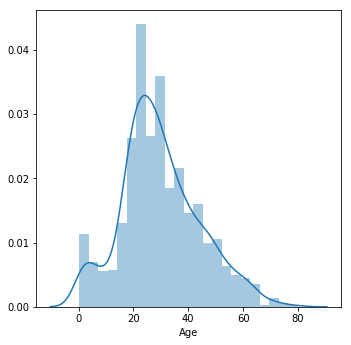

In [28]:
import pandas as pd
titanic = pd.read_csv("data/titanic_survival.csv")
col_to_keep = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
titanic = titanic[col_to_keep]
titanic = titanic.dropna(axis=0)

import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(titanic['Age'])
plt.show()

## Kernel Density Plot ##

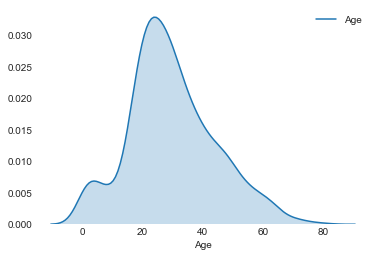

In [29]:
sns.set_style("white")
sns.kdeplot(titanic['Age'], shade=True)
plt.xlabel("Age")
sns.despine(left=True,bottom=True)
plt.show()

## Conditional Distributions

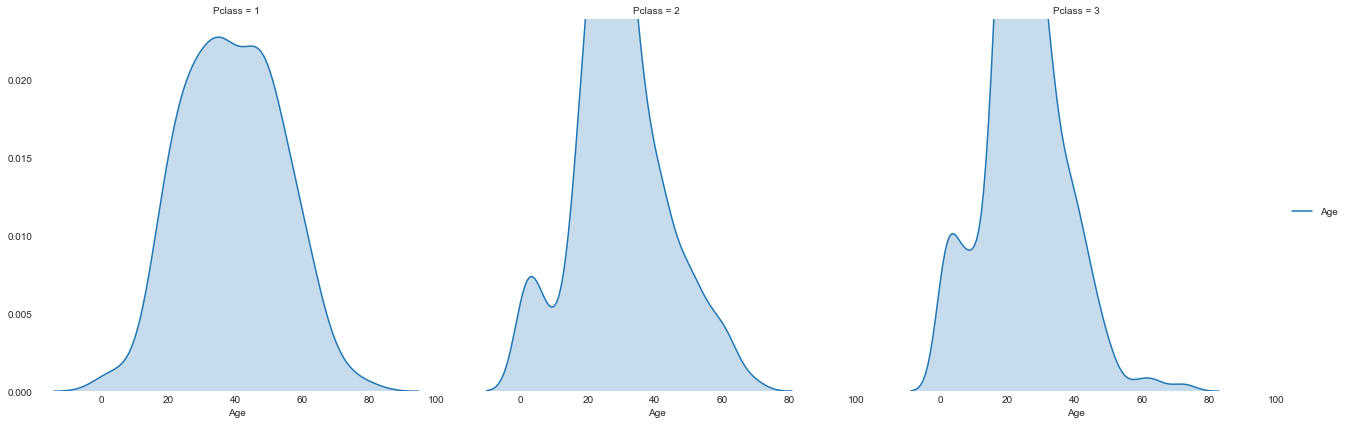

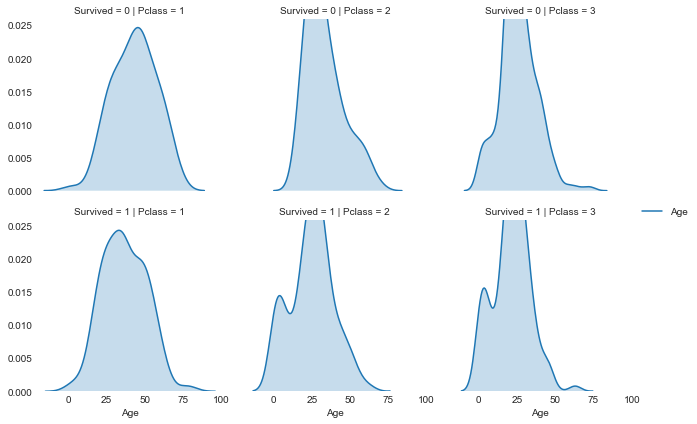

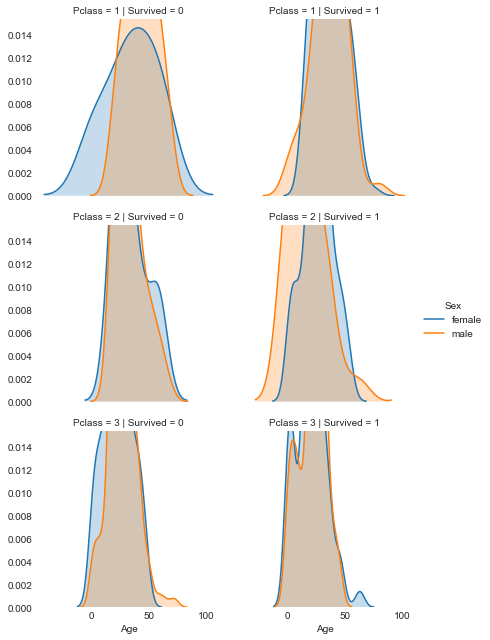

In [30]:
# Single Condition
g = sns.FacetGrid(titanic, col="Pclass", size=6)
g.map(sns.kdeplot,'Age',shade=True)
sns.despine(bottom=True,left=True)
g.add_legend()
plt.show()

# Two Conditions 

g = sns.FacetGrid(titanic, row="Survived", col="Pclass")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
g.add_legend()
plt.show()

# Three Conditions

g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue="Sex", size=3)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
g.add_legend()
plt.show()

<h3>Improving Plot Aesthetics</h3>

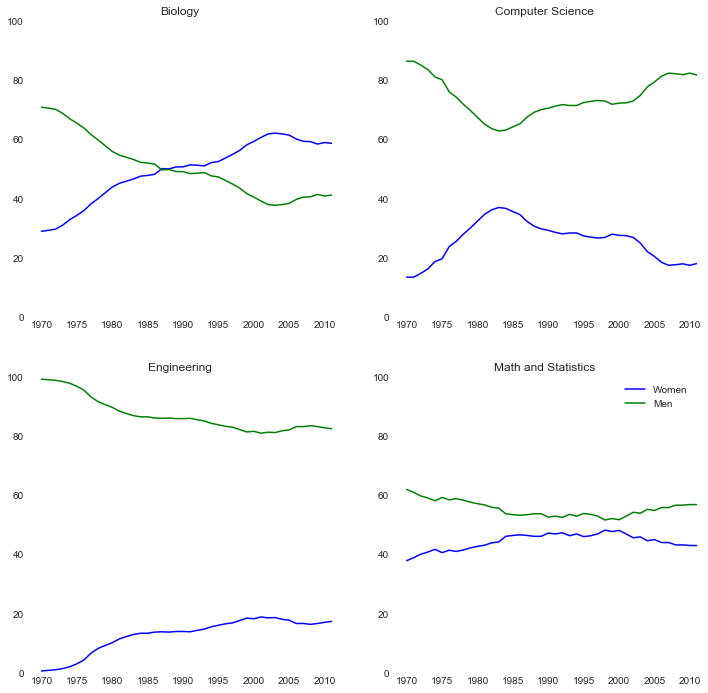

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c='green', label='Men')
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    # Hide tick marks
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    ax.set_title(major_cats[sp])
    # Hide Spines
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    
# Calling pyplot.legend() here will add the legend to the last subplot that was created.
plt.legend(loc='upper right')
plt.show()